# KMeans on car dataset

In [90]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [91]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [92]:
# reading the CSV file into pandas dataframe
car_data = pd.read_csv("cars-dataset.csv") 

In [93]:
# Check top few records to get a feel of the data structure
car_data.head()

car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0

In [94]:
car_data.describe().transpose()     # horsepower is missing

count         mean         std     min       25%     50%       75%  \
cyl   398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp  398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt    398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc   398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr    398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
mpg   398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   

         max  
cyl      8.0  
disp   455.0  
wt    5140.0  
acc     24.8  
yr      82.0  
mpg     46.6

In [95]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [96]:
car_data = car_data.replace('?', np.nan)
car_data['hp']= car_data['hp'].astype('float64')

In [97]:
car_data=car_data.drop(['car name'], axis=1)

In [98]:
car_data.dropna()

cyl   disp     hp    wt   acc  yr   mpg
0      8  307.0  130.0  3504  12.0  70  18.0
1      8  350.0  165.0  3693  11.5  70  15.0
2      8  318.0  150.0  3436  11.0  70  18.0
3      8  304.0  150.0  3433  12.0  70  16.0
4      8  302.0  140.0  3449  10.5  70  17.0
5      8  429.0  198.0  4341  10.0  70  15.0
6      8  454.0  220.0  4354   9.0  70  14.0
7      8  440.0  215.0  4312   8.5  70  14.0
8      8  455.0  225.0  4425  10.0  70  14.0
9      8  390.0  190.0  3850   8.5  70  15.0
10     8  383.0  170.0  3563  10.0  70  15.0
11     8  340.0  160.0  3609   8.0  70  14.0
12     8  400.0  150.0  3761   9.5  70  15.0
13     8  455.0  225.0  3086  10.0  70  14.0
14     4  113.0   95.0  2372  15.0  70  24.0
15     6  198.0   95.0  2833  15.5  70  22.0
16     6  199.0   97.0  2774  15.5  70  18.0
17     6  200.0   85.0  2587  16.0  70  21.0
18     4   97.0   88.0  2130  14.5  70  27.0
19     4   97.0   46.0  1835  20.5  70  26.0
20     4  110.0   87.0  2672  17.5  70  25.0
21     4  107.0   90.0  2430  14.5  70  24.0
22     4  104.0   95.0  2375  17.5  70  25.0
23     4  121.0  113.0  2234  12.5  70  26.0
24     6  199.0   90.0  2648  15.0  70  21.0
25     8  360.0  215.0  4615  14.0  70  10.0
26     8  307.0  200.0  4376  15.0  70  10.0
27     8  318.0  210.0  4382  13.5  70  11.0
28     8  304.0  193.0  4732  18.5  70   9.0
29     4   97.0   88.0  2130  14.5  71  27.0
..   ...    ...    ...   ...   ...  ..   ...
367    4  112.0   88.0  2605  19.6  82  28.0
368    4  112.0   88.0  2640  18.6  82  27.0
369    4  112.0   88.0  2395  18.0  82  34.0
370    4  112.0   85.0  2575  16.2  82  31.0
371    4  135.0   84.0  2525  16.0  82  29.0
372    4  151.0   90.0  2735  18.0  82  27.0
373    4  140.0   92.0  2865  16.4  82  24.0
375    4  105.0   74.0  1980  15.3  82  36.0
376    4   91.0   68.0  2025  18.2  82  37.0
377    4   91.0   68.0  1970  17.6  82  31.0
378    4  105.0   63.0  2125  14.7  82  38.0
379    4   98.0   70.0  2125  17.3  82  36.0
380    4  120.0   88.0  2160  14.5  82  36.0
381    4  107.0   75.0  2205  14.5  82  36.0
382    4  108.0   70.0  2245  16.9  82  34.0
383    4   91.0   67.0  1965  15.0  82  38.0
384    4   91.0   67.0  1965  15.7  82  32.0
385    4   91.0   67.0  1995  16.2  82  38.0
386    6  181.0  110.0  2945  16.4  82  25.0
387    6  262.0   85.0  3015  17.0  82  38.0
388    4  156.0   92.0  2585  14.5  82  26.0
389    6  232.0  112.0  2835  14.7  82  22.0
390    4  144.0   96.0  2665  13.9  82  32.0
391    4  135.0   84.0  2370  13.0  82  36.0
392    4  151.0   90.0  2950  17.3  82  27.0
393    4  140.0   86.0  2790  15.6  82  27.0
394    4   97.0   52.0  2130  24.6  82  44.0
395    4  135.0   84.0  2295  11.6  82  32.0
396    4  120.0   79.0  2625  18.6  82  28.0
397    4  119.0   82.0  2720  19.4  82  31.0

[392 rows x 7 columns]

In [99]:
car_data.fillna(0, inplace=True)

In [100]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


##  Let us do a pair plot analysis to visually check number of likely clusters

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


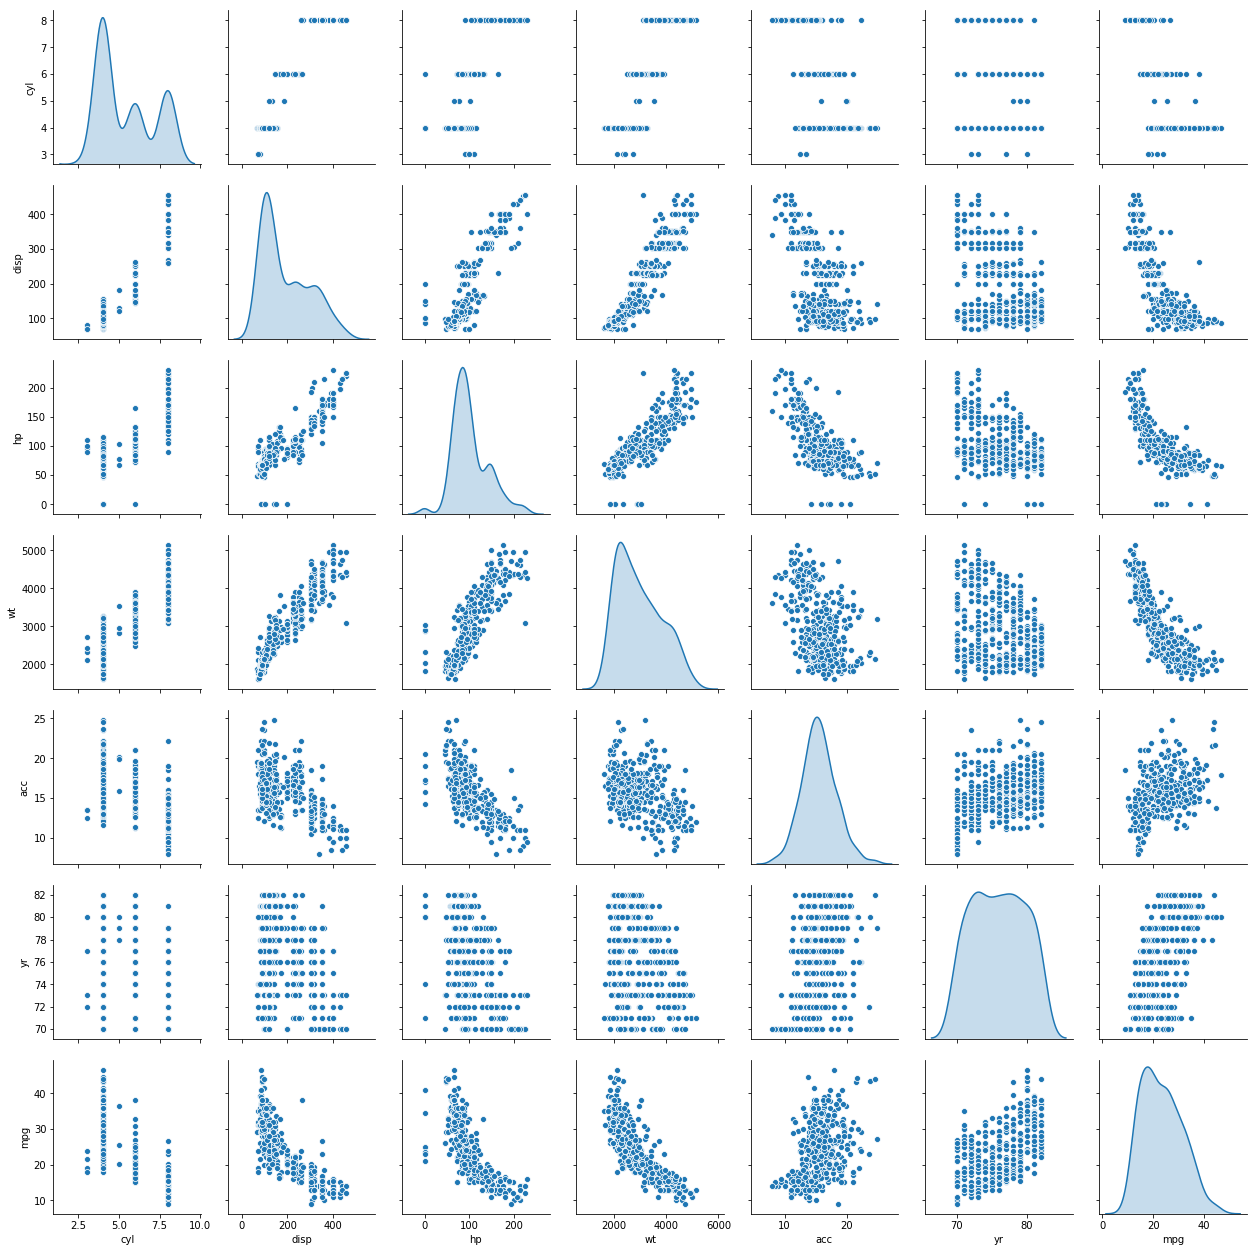

In [101]:

sns.pairplot(car_data, diag_kind='kde')   # to plot density curve instead of histogram



In [102]:
from scipy.stats import zscore

car_data_z = car_data.apply(zscore)

# KMeans Clustering

*** Every cluster is associated with three properties ***
*  1 Cluster centeroids*
*  2 cluster labels*
*  3 Cluster intertia*

In [103]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(car_data_z, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters  cluster_errors  Avg Sil Score
0             2     1306.300653       0.459100
1             3      960.952659       0.338882
2             4      752.860670       0.344809
3             5      680.059381       0.310594

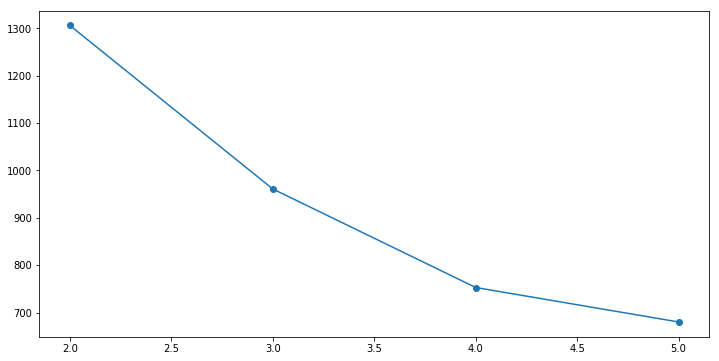

In [104]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [105]:
# The elbow plot shows that 4 might be a good choice for K and it seems logical given we know there are 4 qualities of wine

In [106]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
#cluster = KMeans( n_clusters = 5)
cluster.fit(car_data_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Every cluster gets associated with a lable, centroid and intertia....

In [107]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-0.82506599, -0.78402235, -0.75275521, -0.77275084,  0.37884159,
         1.10677463,  1.18881992],
       [ 0.4267561 ,  0.31085325,  0.00541753,  0.35090666,  0.2967454 ,
         0.05812892, -0.50075266],
       [ 1.49819126,  1.50392292,  1.47938187,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.83900798, -0.7886291 , -0.53414429, -0.74406919,  0.3223385 ,
        -0.64251535,  0.19242419]])

In [108]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(car_data_z) )
centroid_df

cyl      disp        hp        wt       acc        yr       mpg
0 -0.825066 -0.784022 -0.752755 -0.772751  0.378842  1.106775  1.188820
1  0.426756  0.310853  0.005418  0.350907  0.296745  0.058129 -0.500753
2  1.498191  1.503923  1.479382  1.404098 -1.086149 -0.688324 -1.163797
3 -0.839008 -0.788629 -0.534144 -0.744069  0.322339 -0.642515  0.192424

In [109]:
prediction=cluster.predict(car_data_z)
car_data_z["GROUP"] = prediction


In [110]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

car_data_z.groupby("GROUP").count()

cyl  disp   hp   wt  acc   yr  mpg
GROUP                                    
0      113   113  113  113  113  113  113
1       89    89   89   89   89   89   89
2       94    94   94   94   94   94   94
3      102   102  102  102  102  102  102

In [111]:
car_data1 = car_data_z[car_data_z['GROUP'] == 1]
car_data0 = car_data_z[car_data_z['GROUP'] == 0]
car_data2 = car_data_z[car_data_z['GROUP'] == 2]
car_data3 = car_data_z[car_data_z['GROUP'] == 3]

In [112]:
car_data1.shape

(89, 8)

In [113]:
car_data0.shape

(113, 8)

In [114]:
car_data2.shape

(94, 8)

In [115]:
car_data3.shape

(102, 8)

# Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
# centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017293BE0>,
      dtype=object)

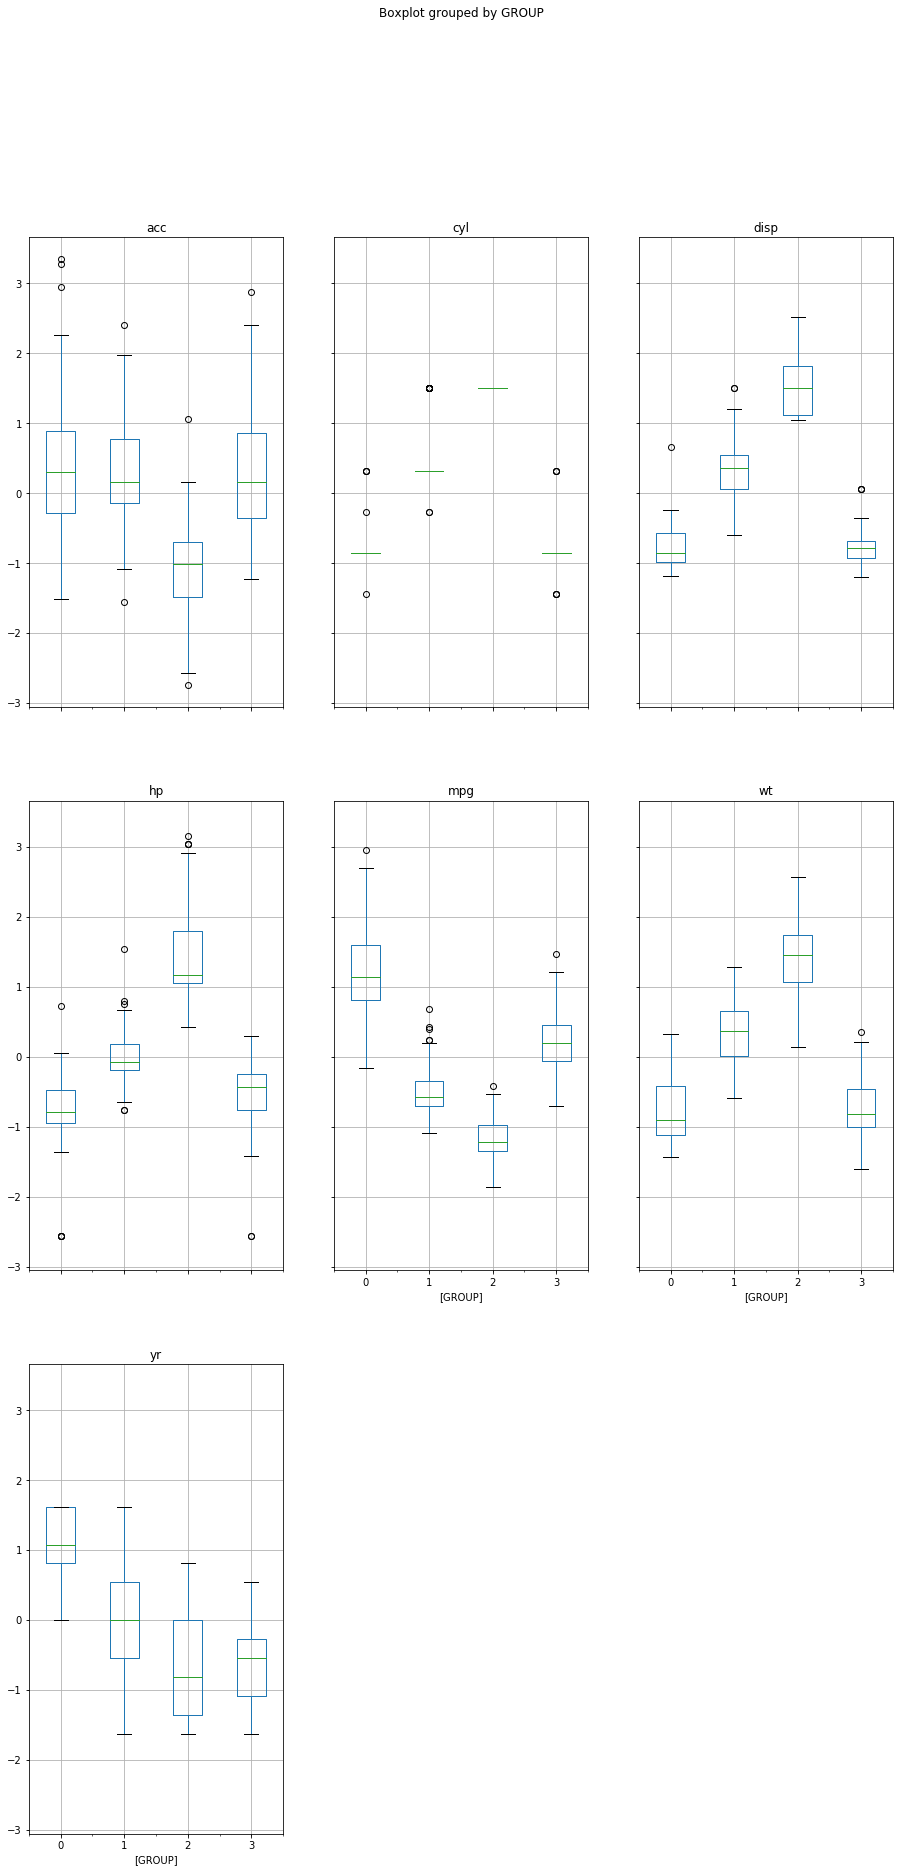

In [116]:
import matplotlib.pylab as plt

car_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))



In [117]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


## Identifying and handling outliers



In [118]:
# Addressing outliers at group level

data = car_data_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(car_data_z['GROUP']))


C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018855358>,
      dtype=object)

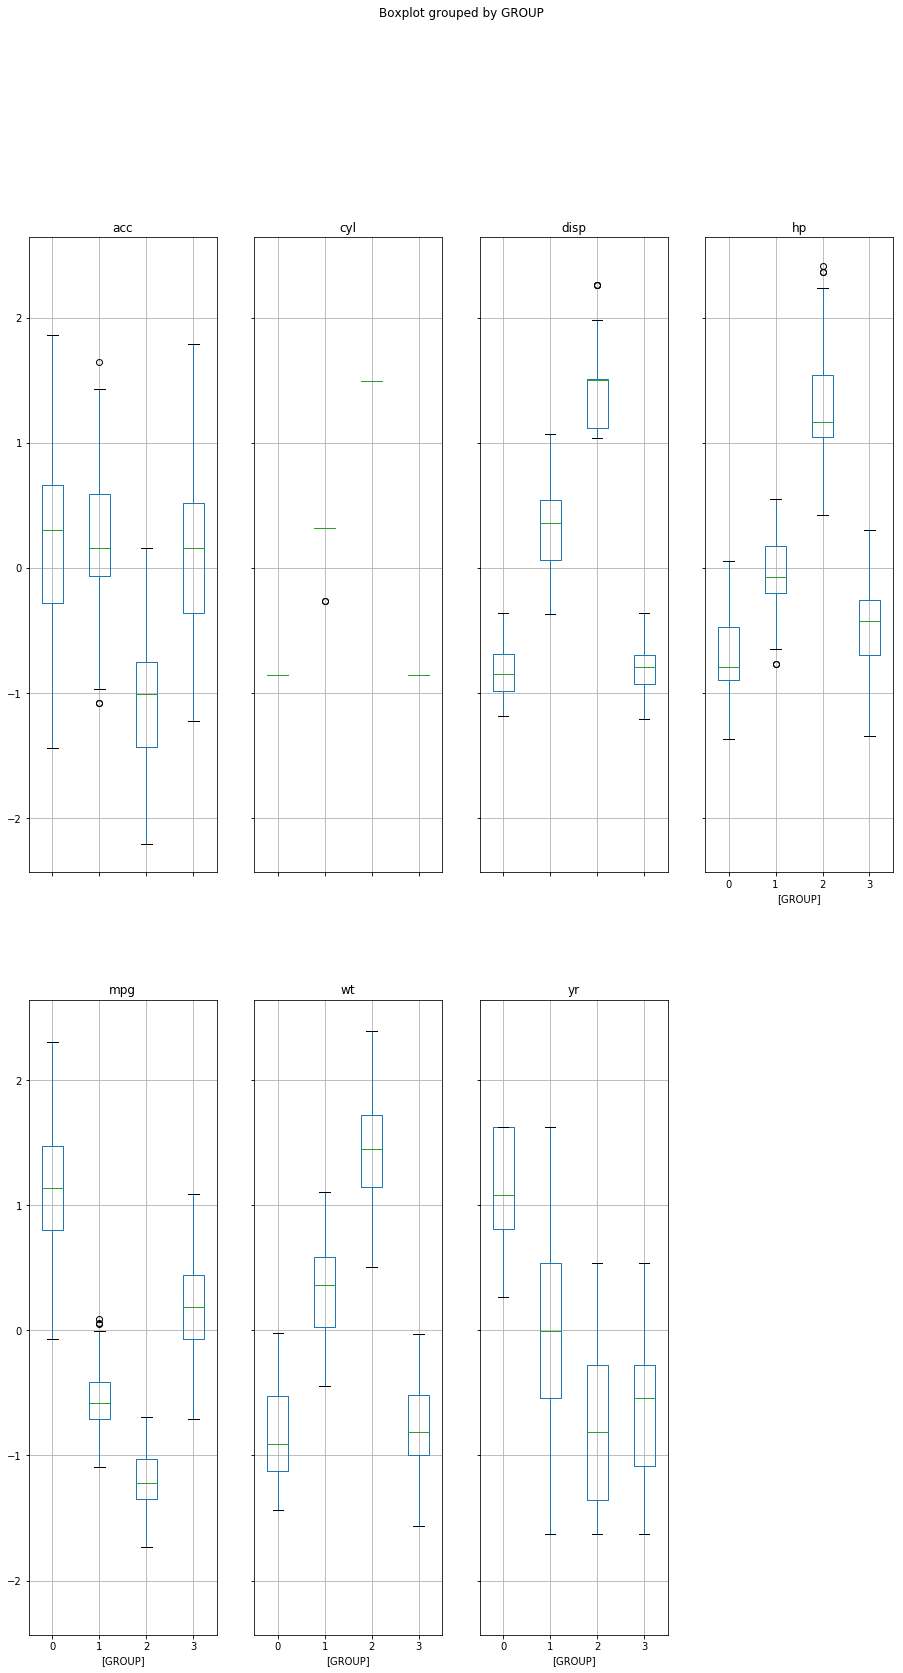

In [119]:
concat_data.boxplot(by = 'GROUP', layout=(3,4), figsize=(15, 40))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


In [120]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [121]:
model.fit(car_data_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x0000000004FD3268>)

In [122]:
car_data_z['labels'] = model.labels_
car_data_z.groupby(["labels"]).count()

cyl  disp   hp   wt  acc   yr  mpg  GROUP
labels                                           
0       113   113  113  113  113  113  113    113
1        89    89   89   89   89   89   89     89
2       102   102  102  102  102  102  102    102
3        94    94   94   94   94   94   94     94

In [123]:
car_clusters = car_data_z.groupby(['labels'])

In [124]:
wine_groups=car_clusters.head()#This creates a pandas dataframegroupby object

In [125]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [126]:
Z = linkage(car_data_z, 'average')
c, coph_dists = cophenet(Z , pdist(car_data_z))

c

0.8284560941641466

In [127]:
Z.shape

Z[1]
Z[1:10]

array([[3.53000000e+02, 3.55000000e+02, 1.21903595e-01, 2.00000000e+00],
       [3.49000000e+02, 3.51000000e+02, 1.47867428e-01, 2.00000000e+00],
       [2.34000000e+02, 2.36000000e+02, 1.83776404e-01, 2.00000000e+00],
       [6.80000000e+01, 6.90000000e+01, 1.86611968e-01, 2.00000000e+00],
       [1.29000000e+02, 1.45000000e+02, 2.09925003e-01, 2.00000000e+00],
       [3.50000000e+01, 3.70000000e+01, 2.20536632e-01, 2.00000000e+00],
       [6.40000000e+01, 7.50000000e+01, 2.32529276e-01, 2.00000000e+00],
       [1.40000000e+01, 2.10000000e+01, 2.37558698e-01, 2.00000000e+00],
       [2.85000000e+02, 2.88000000e+02, 2.45118131e-01, 2.00000000e+00]])

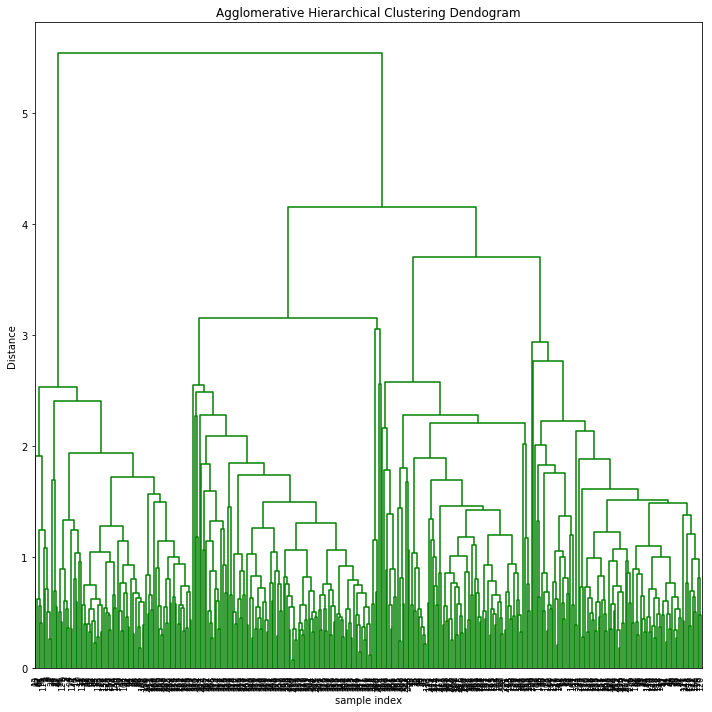

In [128]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

In [129]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(car_data_z, 'complete')
c, coph_dists = cophenet(Z , pdist(car_data_z))

c

0.7844203158632502

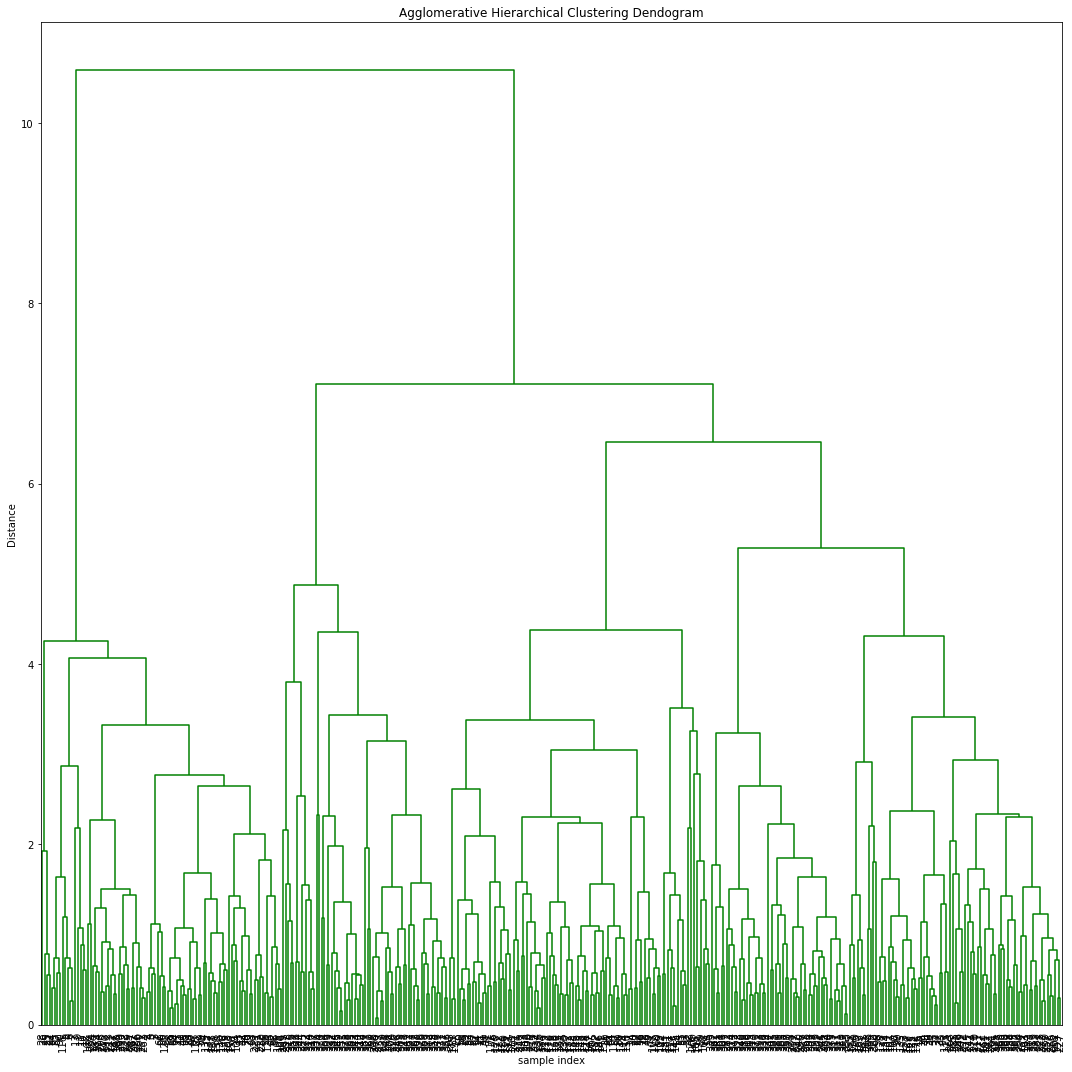

In [130]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [131]:
# importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(car_data_z, 'ward')
c, coph_dists = cophenet(Z , pdist(car_data_z))

c

0.8177671547876185

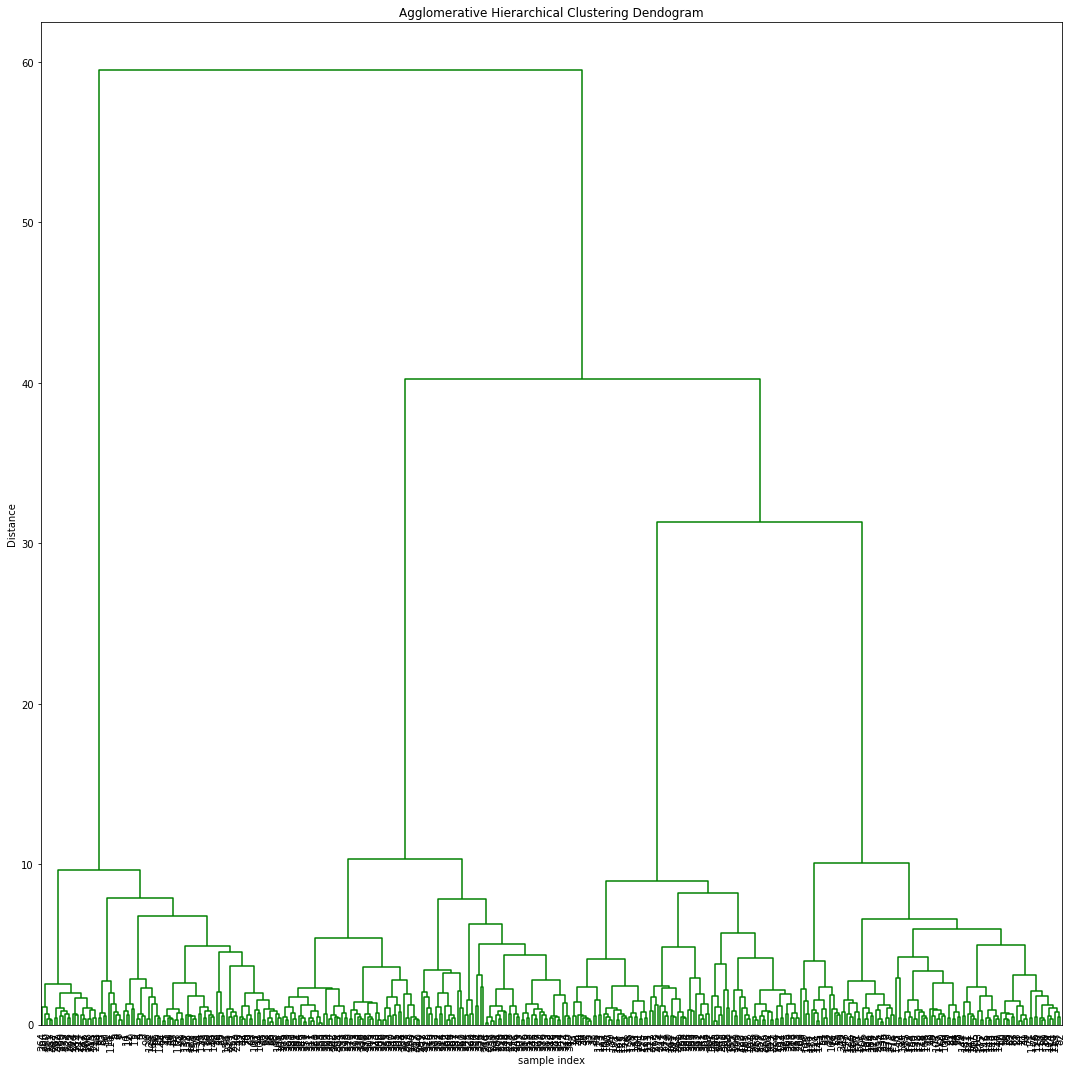

In [133]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [135]:
X = car_data0.drop('mpg', axis=1)
y = car_data0[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.45368610417126976

In [136]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.0536555641760774
The coefficient for disp is -0.02932132213717307
The coefficient for hp is -0.12827438221702867
The coefficient for wt is -1.0998794494502284
The coefficient for acc is 0.19077441388145291
The coefficient for yr is 0.38012482328775565
The coefficient for GROUP is 0.0


In [137]:
X = car_data1.drop('mpg', axis=1)
y = car_data1[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)
#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

0.28557804392908537

In [138]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.2437834245537066
The coefficient for disp is 0.022252790420019843
The coefficient for hp is -0.11759605550612726
The coefficient for wt is -0.5266854942515177
The coefficient for acc is 0.010690938821873077
The coefficient for yr is 0.22723086555877003
The coefficient for GROUP is 0.0


In [139]:
X = car_data2.drop('mpg', axis=1)
y = car_data2[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.2847512316567655

In [140]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.3690724645151584
The coefficient for disp is -0.03109996106288839
The coefficient for hp is -0.1335000905379054
The coefficient for wt is -0.135449403976025
The coefficient for acc is -0.18613414291827218
The coefficient for yr is 0.17572461373859705
The coefficient for GROUP is 0.0


In [141]:
X = car_data3.drop('mpg', axis=1)
y = car_data3[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.5202361690605682

In [142]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.6470954902947731
The coefficient for disp is -0.6647029086984039
The coefficient for hp is 0.055879457793017354
The coefficient for wt is -0.7019891871867512
The coefficient for acc is -0.003341759026554403
The coefficient for yr is 0.21698202852364568
The coefficient for GROUP is 0.0
